In [1]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import svm

In [2]:
#read the file
df = pd.read_csv("Loan.csv")

In [3]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0.0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1.0,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0.0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0.0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0.0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [4]:
df.shape

(598, 13)

In [5]:
df.describe()

,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,586.000000,598.000000,598.000000,577.000000,584.000000,549.000000
mean,0.755973,5292.252508,1631.499866,144.968804,341.917808,0.843352
std,1.007751,5807.265364,2953.315785,82.704182,65.205994,0.363800
min,0.000000,150.000000,0.000000,9.000000,12.000000,0.000000
25%,0.000000,2877.500000,0.000000,100.000000,360.000000,1.000000
50%,0.000000,3806.000000,1211.500000,127.000000,360.000000,1.000000
75%,1.750000,5746.000000,2324.000000,167.000000,360.000000,1.000000
max,3.000000,81000.000000,41667.000000,650.000000,480.000000,1.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 598 entries, 0 to 597
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            598 non-null    object 
 1   Gender             598 non-null    object 
 2   Married            598 non-null    object 
 3   Dependents         586 non-null    float64
 4   Education          598 non-null    object 
 5   Self_Employed      598 non-null    object 
 6   ApplicantIncome    598 non-null    int64  
 7   CoapplicantIncome  598 non-null    float64
 8   LoanAmount         577 non-null    float64
 9   Loan_Amount_Term   584 non-null    float64
 10  Credit_History     549 non-null    float64
 11  Property_Area      598 non-null    object 
 12  Loan_Status        598 non-null    object 
dtypes: float64(5), int64(1), object(7)
memory usage: 60.9+ KB


<Axes: >

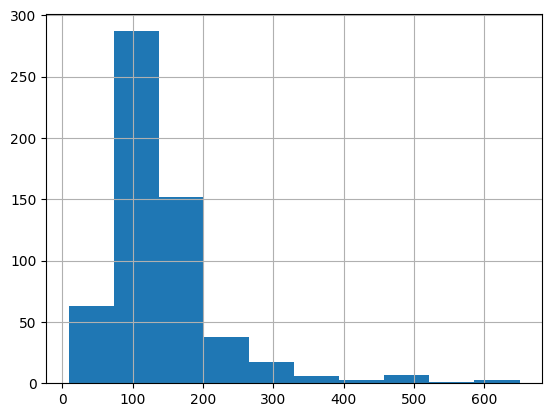

In [7]:
df['LoanAmount'].hist()

<Axes: >

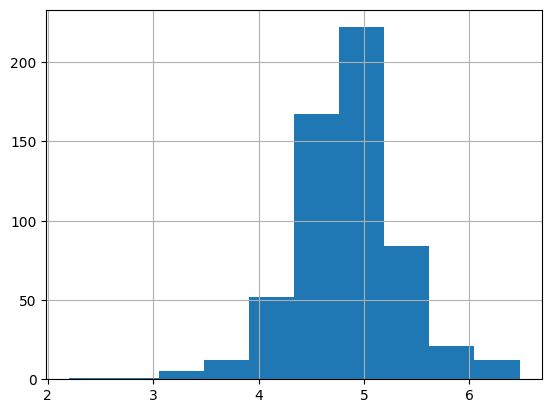

In [8]:
#Log transformation can help in making the data more normal distribution-like. 
# Many statistical methods and machine learning algorithms perform better when the data is normally distributed.
df['Loanamount_log']=np.log(df['LoanAmount'])
df['Loanamount_log'].hist()

<Axes: >

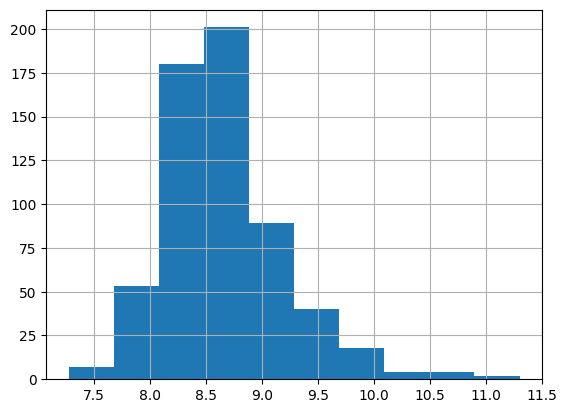

In [9]:
#Creates a new column Total_income which is the sum of ApplicantIncome and CoapplicantIncome.By transforming Total_income using
#the logarithm, the distribution of income becomes more symmetric, making it easier to model 
df['Total_income']= df['ApplicantIncome']+df['CoapplicantIncome']
df['Total_income_log'] = np.log(df['Total_income']+1) ## Adding 1 to avoid log(0)
df['Total_income_log'].hist()

In [10]:
df.Dependents.value_counts()

Dependents
0.0    338
1.0    101
2.0     99
3.0     48
Name: count, dtype: int64

In [11]:
#counting missing values in each coloumns.
df.isnull().sum()

Loan_ID               0
Gender                0
Married               0
Dependents           12
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           21
Loan_Amount_Term     14
Credit_History       49
Property_Area         0
Loan_Status           0
Loanamount_log       21
Total_income          0
Total_income_log      0
dtype: int64

In [12]:
df['Dependents'].fillna(df['Dependents'].mode()[0], inplace=True)
# Fill missing values in 'LoanAmount' with the mean of 'LoanAmount'
df['LoanAmount'] = df['LoanAmount'].fillna(df['LoanAmount'].mean())

# Assuming 'Loanamount_log' is already created
df['Loanamount_log'] = df['Loanamount_log'].fillna(df['Loanamount_log'].mean())

# Fill missing values in 'Loan_Amount_Term' with the mode of 'Loan_Amount_Term'
# Mode returns a Series, so we take the first mode
df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mode()[0], inplace=True)

df['Credit_History'].fillna(df['Credit_History'].mode()[0], inplace=True)


In [13]:
df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
Loanamount_log       0
Total_income         0
Total_income_log     0
dtype: int64

### Data Visualization

Married
Yes    388
No     210
Name: count, dtype: int64


<Axes: xlabel='Married', ylabel='count'>

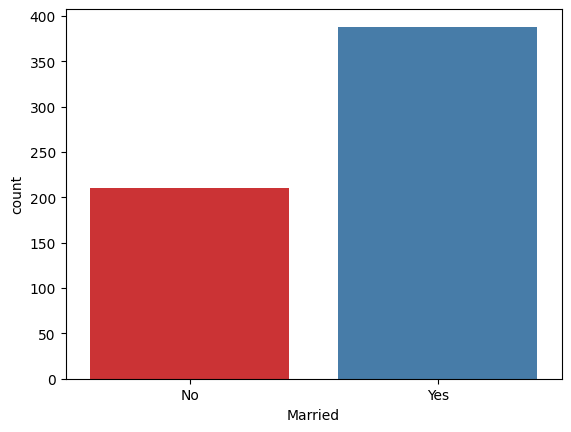

In [14]:
print(df['Married'].value_counts())
sns.countplot(x='Married',hue='Married', data=df,palette='Set1')

Gender
Male      487
Female    111
Name: count, dtype: int64


<Axes: xlabel='Gender', ylabel='count'>

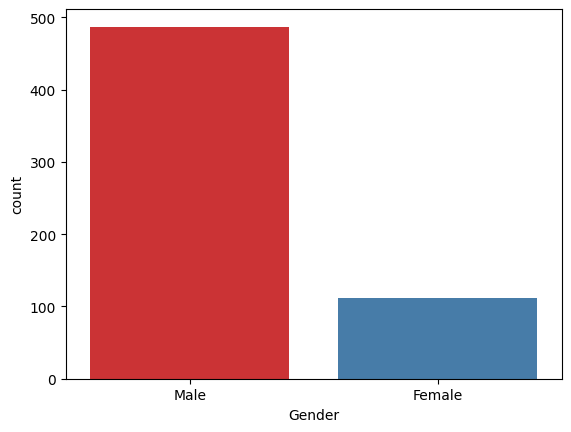

In [15]:
print(df['Gender'].value_counts())
sns.countplot(x='Gender',hue='Gender', data=df,palette='Set1')

Dependents
0.0    350
1.0    101
2.0     99
3.0     48
Name: count, dtype: int64


<Axes: xlabel='Dependents', ylabel='count'>

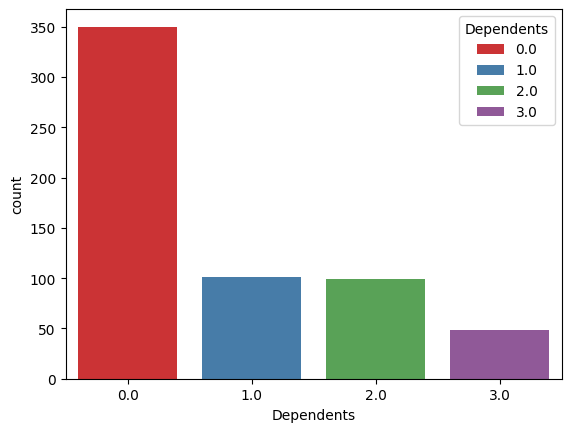

In [16]:
print(df['Dependents'].value_counts())
sns.countplot(x='Dependents',hue='Dependents', data=df,palette='Set1')

Self_Employed
No     488
Yes    110
Name: count, dtype: int64


<Axes: xlabel='Self_Employed', ylabel='count'>

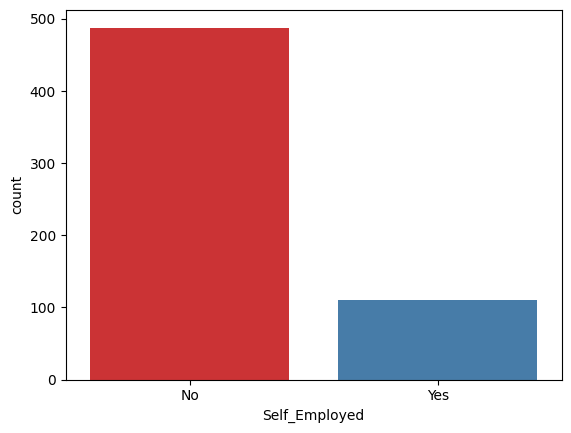

In [17]:
print(df['Self_Employed'].value_counts())
sns.countplot(x='Self_Employed',hue='Self_Employed', data=df,palette='Set1')

Credit_History
1.0    512
0.0     86
Name: count, dtype: int64


<Axes: xlabel='Credit_History', ylabel='count'>

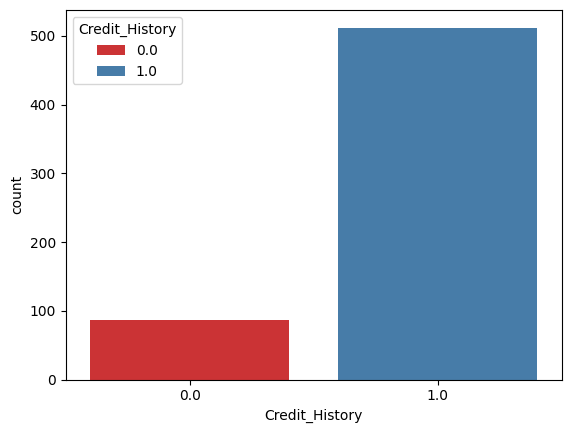

In [18]:
print(df['Credit_History'].value_counts())
sns.countplot(x='Credit_History',hue='Credit_History', data=df,palette='Set1')

In [19]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Loanamount_log,Total_income,Total_income_log
0,LP001002,Male,No,0.0,Graduate,No,5849,0.0,144.968804,360.0,1.0,Urban,Y,4.850145,5849.0,8.674197
1,LP001003,Male,Yes,1.0,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,N,4.852030,6091.0,8.714732
2,LP001005,Male,Yes,0.0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,Y,4.189655,3000.0,8.006701
3,LP001006,Male,Yes,0.0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,Y,4.787492,4941.0,8.505525
4,LP001008,Male,No,0.0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,Y,4.948760,6000.0,8.699681


### Feature Selection and Target Definition

In [20]:
X= df.iloc[:, np.r_[1:5, 9:11, 13:15]].values 
y = df.iloc[:,12 ] #loan_status is the target variable
X

array([['Male', 'No', 0.0, ..., 1.0, 4.850145095517304, 5849.0],
       ['Male', 'Yes', 1.0, ..., 1.0, 4.852030263919617, 6091.0],
       ['Male', 'Yes', 0.0, ..., 1.0, 4.189654742026425, 3000.0],
       ...,
       ['Male', 'Yes', 1.0, ..., 1.0, 5.53338948872752, 8312.0],
       ['Male', 'Yes', 2.0, ..., 1.0, 5.231108616854587, 7583.0],
       ['Female', 'No', 0.0, ..., 0.0, 4.890349128221754, 4583.0]],
      dtype=object)

In [21]:
y

0      Y
1      N
2      Y
3      Y
4      Y
      ..
593    Y
594    Y
595    Y
596    Y
597    N
Name: Loan_Status, Length: 598, dtype: object

### Split a dataset into training and testing sets

In [23]:
from sklearn.model_selection import train_test_split

In [24]:
#The parameters test_size=0.2 indicate that 20% of the data will be used for testing, and random_state=0 is just a random seed to ensure reproducibility
X_train, x_test, Y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=0)
X_train

array([['Male', 'Yes', 2.0, ..., 1.0, 5.10594547390058, 11500.0],
       ['Female', 'No', 0.0, ..., 0.0, 4.634728988229636, 5000.0],
       ['Male', 'Yes', 1.0, ..., 1.0, 5.147494476813453, 7283.0],
       ...,
       ['Male', 'No', 0.0, ..., 0.0, 4.820281565605037, 5124.0],
       ['Female', 'No', 0.0, ..., 1.0, 4.787491742782046, 4272.0],
       ['Male', 'Yes', 2.0, ..., 1.0, 5.616771097666572, 16666.0]],
      dtype=object)

In [25]:
from sklearn.preprocessing import LabelEncoder

In [26]:
labelencoder_x = LabelEncoder()

In [27]:
for i in range(0, 5):
    X_train[:, i] = labelencoder_x.fit_transform(X_train[:,i])
    X_train[:, 7] = labelencoder_x.fit_transform(X_train[:,7])
X_train

array([[1, 1, 2, ..., 1.0, 5.10594547390058, 399],
       [0, 0, 0, ..., 0.0, 4.634728988229636, 188],
       [1, 1, 1, ..., 1.0, 5.147494476813453, 321],
       ...,
       [1, 0, 0, ..., 0.0, 4.820281565605037, 197],
       [0, 0, 0, ..., 1.0, 4.787491742782046, 121],
       [1, 1, 2, ..., 1.0, 5.616771097666572, 419]], dtype=object)

In [28]:
labelencoder_y = LabelEncoder()
Y_train = labelencoder_y.fit_transform(Y_train)
Y_train

array([1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0,
       1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1,
       0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1,
       1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0,
       0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1,
       1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,

In [44]:
for i in range(0,5):
    x_test[:,i]= labelencoder_x.fit_transform(x_test[:,i])
    x_test[:,7]= labelencoder_x.fit_transform(x_test[:,7])

In [30]:
y_test = labelencoder_y.fit_transform(y_test)
y_test

array([1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0,
       1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1,
       0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0])

## Model Training and Evaluation

In [31]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
X_train = ss.fit_transform(X_train)
x_test = ss.fit_transform(x_test)

In [32]:
from sklearn.ensemble import RandomForestClassifier

In [33]:
rfc = RandomForestClassifier()
rfc.fit(X_train, Y_train)

RandomForestClassifier()

In [34]:
from sklearn import metrics
y_pred_m1 = rfc.predict(x_test)
print("Randon forest Accuracy",metrics.accuracy_score(y_test,y_pred_m1))
y_pred_m1

Randon forest Accuracy 0.775


array([0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0,
       1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0])

In [35]:
from sklearn.naive_bayes import GaussianNB

In [36]:
nb = GaussianNB()
nb.fit(X_train, Y_train)

GaussianNB()

In [37]:
y_pred_m2 = nb.predict(x_test)
print("GaussianNB classifier Accuracy", metrics.accuracy_score( y_test,y_pred_m2))
y_pred_m2

GaussianNB classifier Accuracy 0.8083333333333333


array([1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0])

In [38]:
from sklearn.tree import DecisionTreeClassifier
dtc= DecisionTreeClassifier()
dtc.fit(X_train, Y_train)

DecisionTreeClassifier()

In [39]:
y_pred_m3=dtc.predict(x_test)
print("DecisionTreeClassifier accuracy",metrics.accuracy_score(y_test,y_pred_m3))
y_pred_m3

DecisionTreeClassifier accuracy 0.6666666666666666


array([0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0,
       1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1,
       0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1,
       0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 0])

In [40]:
from sklearn.neighbors import KNeighborsClassifier
knc = KNeighborsClassifier()
knc.fit(X_train, Y_train)

KNeighborsClassifier()

In [41]:
y_pred_m4 = knc.predict(x_test)
print("KNeighborsClassifier Accuracy",metrics.accuracy_score(y_test,y_pred_m4))
y_pred_m4

KNeighborsClassifier Accuracy 0.8166666666666667


array([0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0])

### Classification Reports for Multiple Models

In [42]:
from sklearn.metrics import classification_report

def gen_classification_rep(model_name,y_test,y_pred):
    report = classification_report(y_test, y_pred)
    print(f"classification report for model {model_name}:\n{report}")
gen_classification_rep(rfc,y_test,y_pred_m1)
gen_classification_rep(nb,y_test,y_pred_m2)
gen_classification_rep(dtc,y_test,y_pred_m3)
gen_classification_rep(knc,y_test,y_pred_m4)

classification report for model RandomForestClassifier():
              precision    recall  f1-score   support

           0       0.64      0.47      0.54        34
           1       0.81      0.90      0.85        86

    accuracy                           0.78       120
   macro avg       0.73      0.68      0.70       120
weighted avg       0.76      0.78      0.76       120

classification report for model GaussianNB():
              precision    recall  f1-score   support

           0       0.79      0.44      0.57        34
           1       0.81      0.95      0.88        86

    accuracy                           0.81       120
   macro avg       0.80      0.70      0.72       120
weighted avg       0.81      0.81      0.79       120

classification report for model DecisionTreeClassifier():
              precision    recall  f1-score   support

           0       0.42      0.50      0.46        34
           1       0.79      0.73      0.76        86

    accuracy        

### Conclusion

Accuracy: The highest accuracy is achieved by the KNeighborsClassifier (0.82), followed closely by GaussianNB (0.81).
F1-Score: The highest weighted average F1-Score is achieved by KNeighborsClassifier (0.80), followed by GaussianNB (0.79).
Recall for Class 1: All models have high recall for class 1, but GaussianNB (0.95) and KNeighborsClassifier (0.97) are particularly strong.

KNeighborsClassifier appears to be the best performer overall:

It has the highest accuracy (0.82).
It has the highest weighted average F1-score (0.80).
It maintains a good balance of precision and recall across both classes.